# Machine Learning Challenge - Build A Heart Attack Predictor

# Objective: Build a heart attack predictor based on past diagnostic data of patients using a machine learning model such as Logistic Regression or Decision Tree

## Step-1 : Importing Libraries & Dataset

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Load the dataset

heart_df = pd.read_csv('heart_disease_data.csv') 
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#Checking Missing Values
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
heart_df.shape

(303, 14)

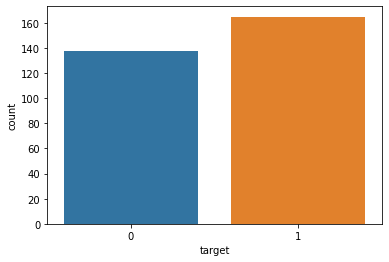

In [11]:
#Checking Class Imbalance
sns.countplot(heart_df['target'], label = "Count") 

## Step-2 : Train-Test Split

In [9]:
features = heart_df.drop('target',1)
labels = heart_df['target']

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


## Step-3 : Logistic Regression Modeling

In [14]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [16]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'C': 0.1}

0.664 (+/-0.127) for {'C': 0.001}
0.698 (+/-0.115) for {'C': 0.01}
0.825 (+/-0.144) for {'C': 0.1}
0.82 (+/-0.144) for {'C': 1}
0.811 (+/-0.145) for {'C': 10}
0.816 (+/-0.115) for {'C': 100}
0.816 (+/-0.12) for {'C': 1000}


In [17]:
cv.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
#Fit The model
lr1 = LogisticRegression(C=0.1)
lr1.fit(X_train, y_train)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Step-4 : Evaluation Metrics

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [24]:
# Evaluating On Test Set 

y_pred = lr1.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred),3)
precision = round(precision_score(y_test, y_pred),3)
recall = round(recall_score(y_test, y_pred),3)
print('Best Params: {} /-- Accuracy: {} / Precision: {} / Recall: {}'.format(lr1.C,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

Best Params: 0.1 /-- Accuracy: 0.857 / Precision: 0.863 / Recall: 0.88


# Report

  ### 1. Here I have used Logistic Regression Algorithm for modeling and predicting heart attack based on the features in the dataset
  ### 2. Also, i've used GridSearch CV for hyperparameter tuning to select the best combination for the model.
  ### 3. From the results, the Logistic Regression Model with the parameter C=0.1 is selected as it gives the best performance 
  ### 4. The Model gives an overall accuracy of 85.7%
  ### 4. The Model gives an overall precision of 86.3%
  ### 4. The Model gives an overall recall of 88%
  